# Python libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Dataset loading.....

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/parkinsons.data')

In [6]:
#sample data
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
#overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
# exploring the columns
data['name'][:5]

0    phon_R01_S01_1
1    phon_R01_S01_2
2    phon_R01_S01_3
3    phon_R01_S01_4
4    phon_R01_S01_5
Name: name, dtype: object

In [9]:
#dropping the name column
data.drop('name',axis=1,inplace=True)

In [10]:
data['status'].unique()

array([1, 0])

Status column contains 2 possible values   
0 indicates healthy person.  
1 indicates PD person.  

# Exploratory Data Analysis

In [11]:
#statistical view of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


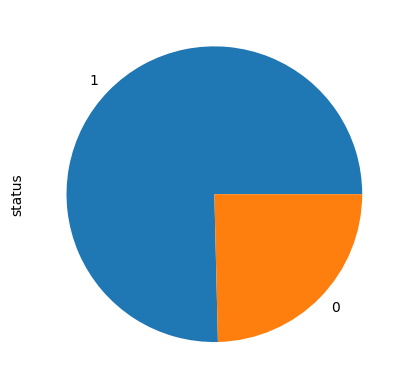

In [12]:
#distribution of target variables
data['status'].value_counts().plot.pie()
plt.show()

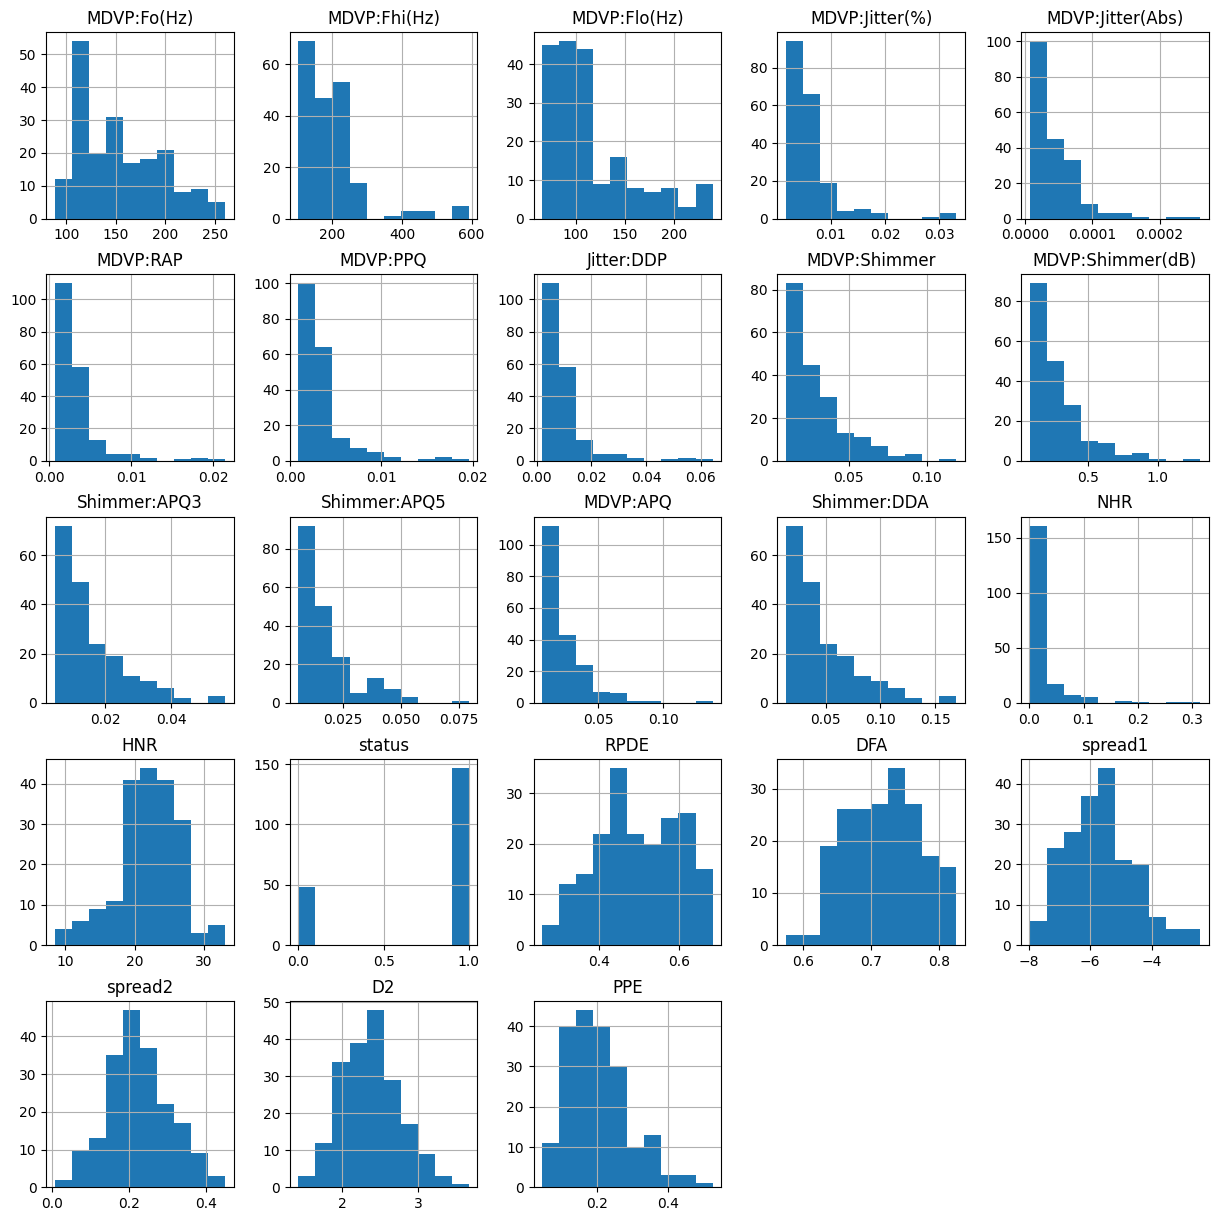

In [13]:
#histograms of the features
data.hist(figsize=(15,15))
plt.show()

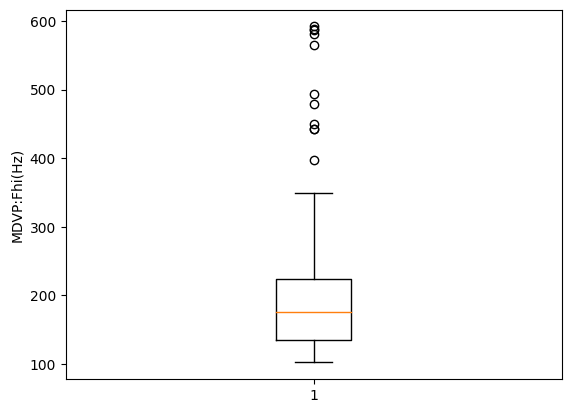

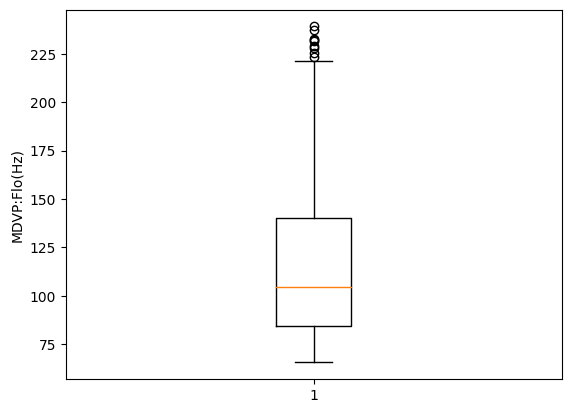

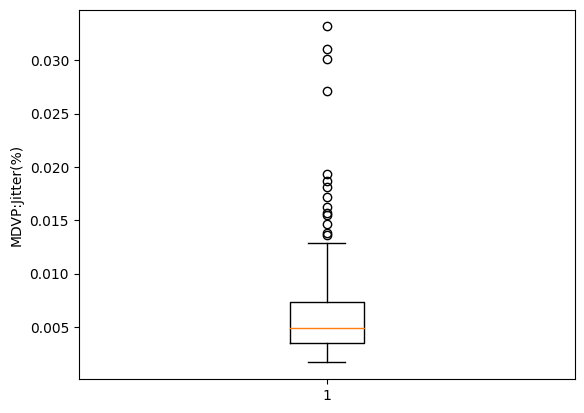

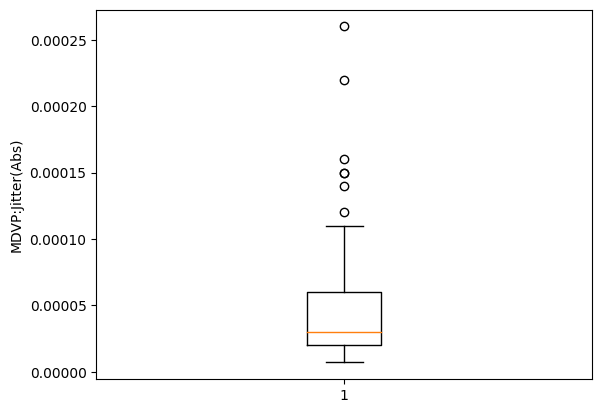

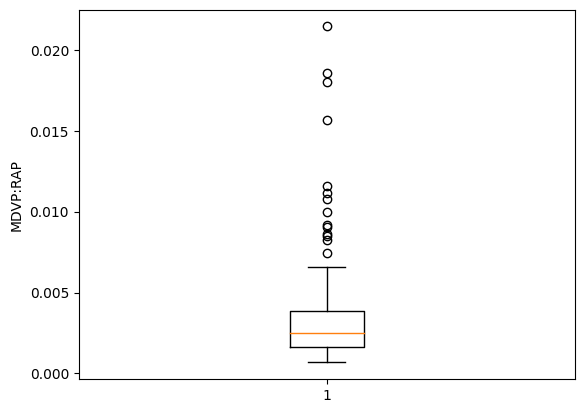

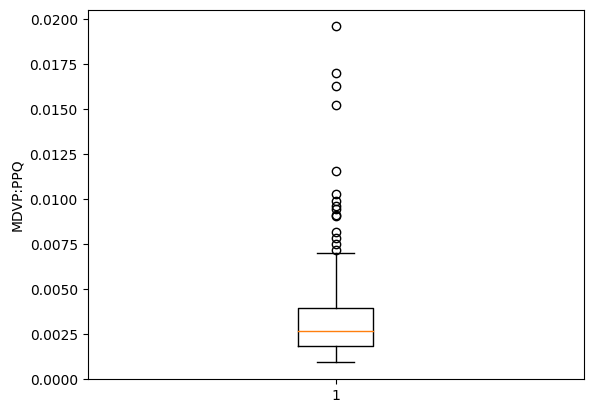

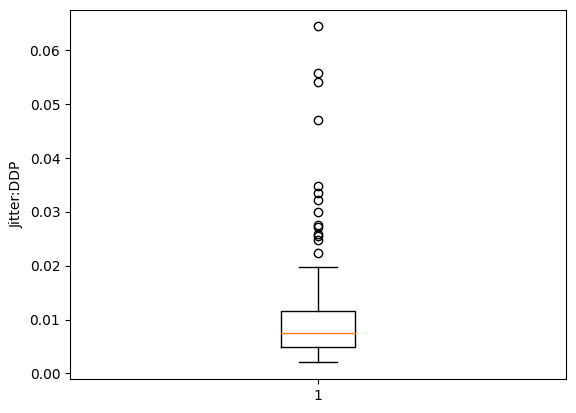

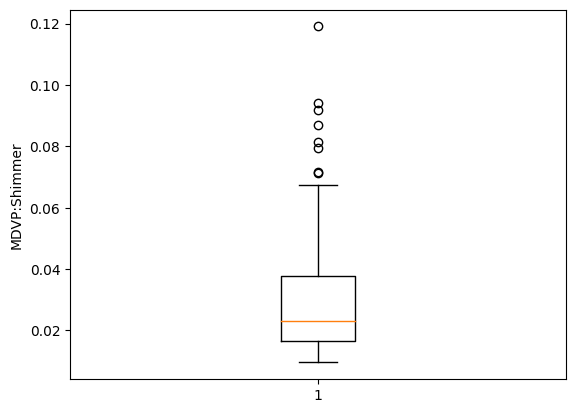

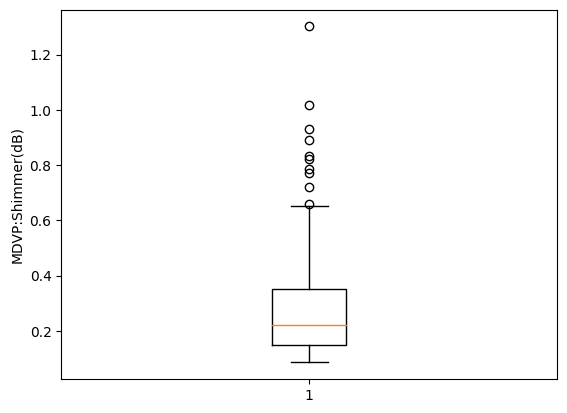

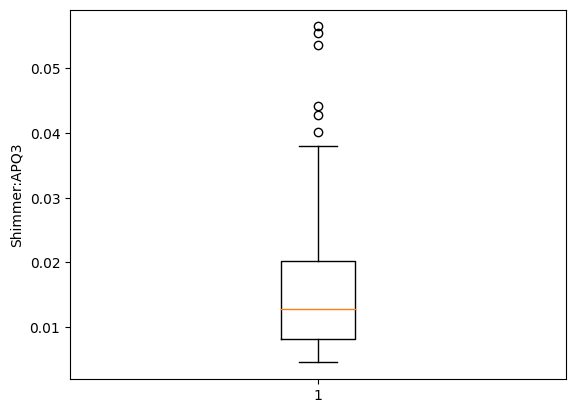

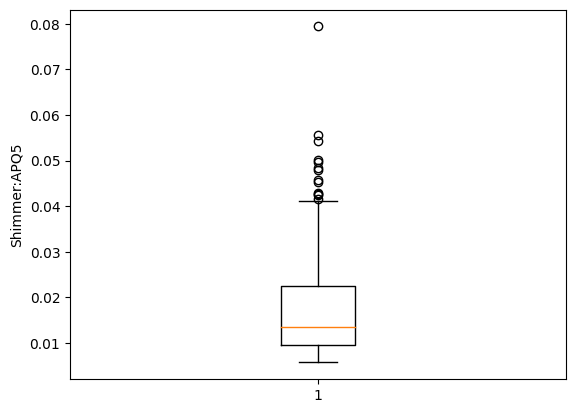

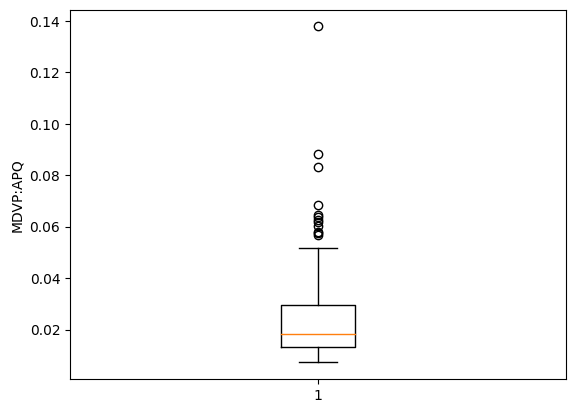

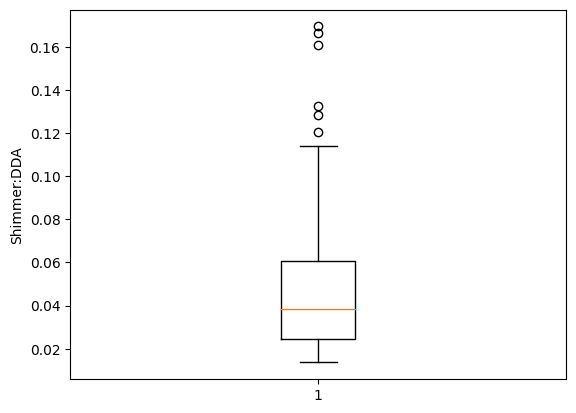

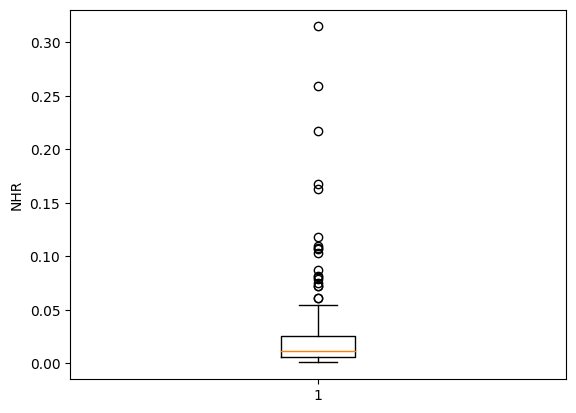

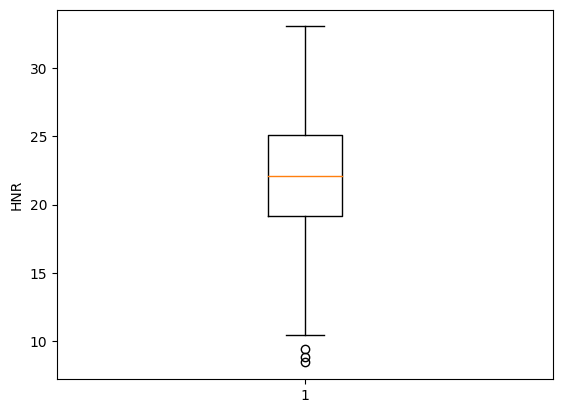

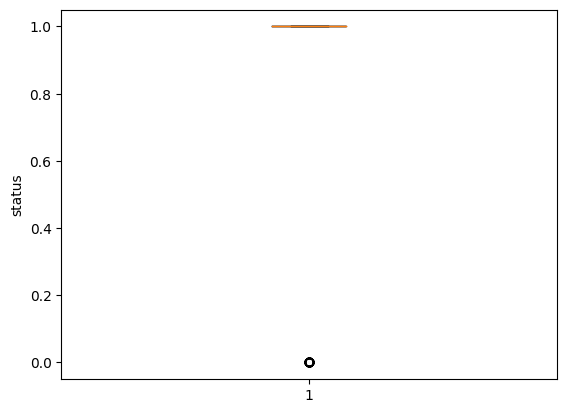

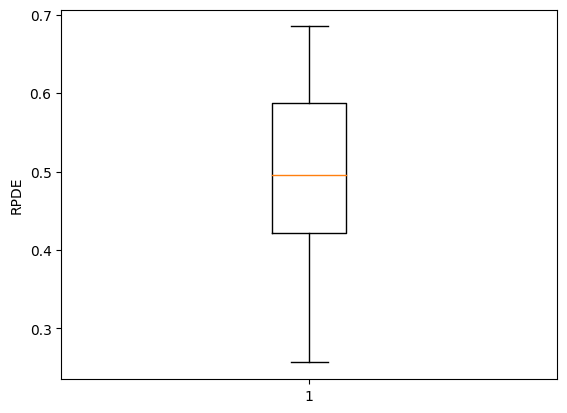

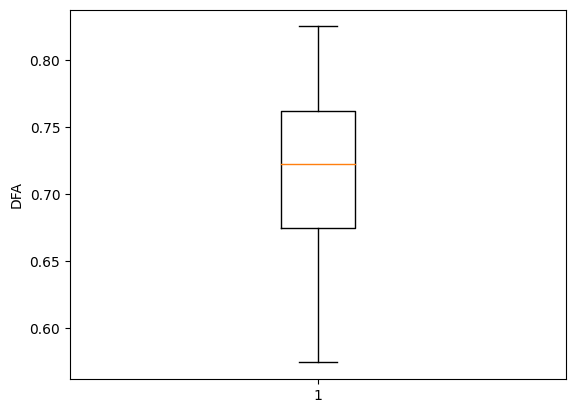

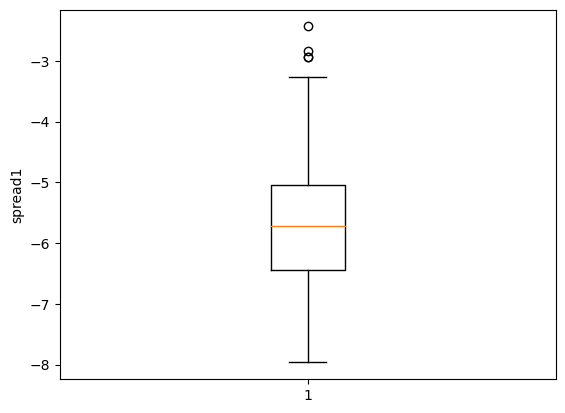

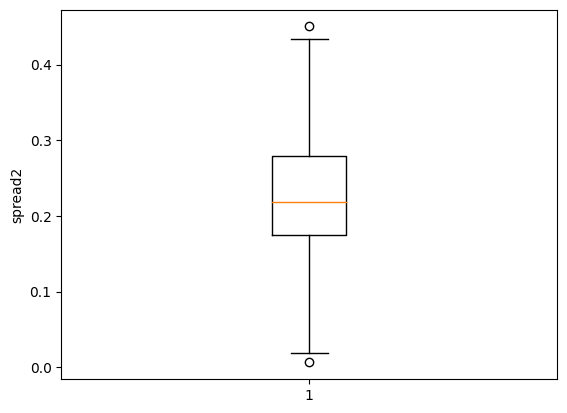

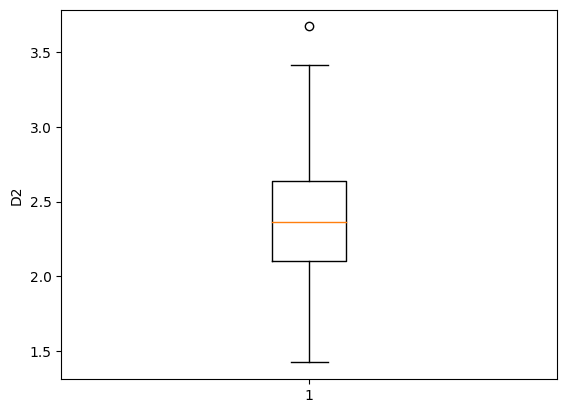

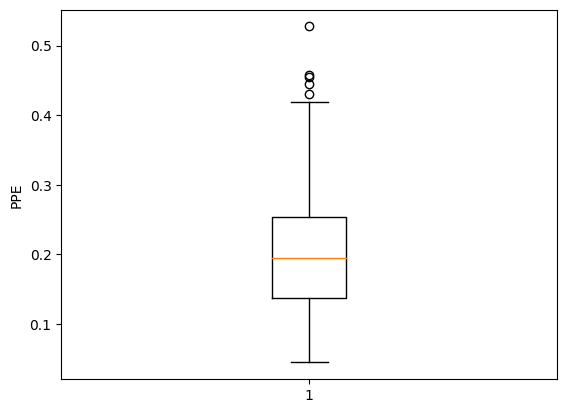

In [14]:
for i in data.columns[1:]:
    fig, ax = plt.subplots()
    ax.boxplot(data[i])
    plt.ylabel(i)
    plt.show()




# Data preparation

In [15]:
#encoding the categorical data
le = LabelEncoder()
le.fit_transform(data['status'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
#seperating features and targets
X = data.drop('status',axis=1)
y = data['status']

#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:

#scaling the data
sc_x = StandardScaler()

x_train = sc_x.fit_transform(X_train)

X_test = sc_x.transform(X_test)

# Appying PCA

In [18]:


# Create principal components
pca = PCA()
X_pca = pca.fit_transform(x_train)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,3.082134,0.036326,-1.463410,-0.337224,2.291516,0.063773,-0.461972,-0.324596,0.105665,-0.194198,...,-0.072178,0.199581,-0.411321,-0.003572,0.066890,0.043082,0.045797,0.078472,-0.000309,0.000114
1,-1.853120,-0.557412,-0.097419,-0.192924,-1.738745,0.092723,-1.088315,0.179151,-0.717097,0.274301,...,0.117106,0.070659,0.006608,0.008176,-0.013973,0.033532,-0.091169,0.004956,-0.000099,0.000029
2,-3.068138,1.607105,0.234150,-0.078532,1.116268,0.274899,-0.538317,0.442311,-0.027234,-0.647197,...,0.119604,-0.305451,0.117427,0.028885,-0.043337,-0.067641,0.001140,0.001267,0.000642,0.000006
3,-0.278556,-0.552459,-0.456068,0.761241,1.379772,-0.334862,0.627514,0.751929,-0.788054,-0.840910,...,-0.062111,0.154139,0.149609,-0.141482,0.019555,-0.032705,0.041581,0.018807,-0.000379,-0.000090
4,0.301645,0.855331,0.663338,3.454685,-0.923070,2.340152,-0.449098,0.356338,0.456063,0.391461,...,0.421724,0.049985,-0.078351,0.156412,0.204895,-0.124462,0.132626,0.022785,0.001004,-0.000025


In [19]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
MDVP:Fo(Hz),-0.042709,0.556091,0.146492,-0.087931,-0.123209,-0.135860,0.023839,0.209461,0.050598,-0.628038,...,0.136330,-0.088603,-0.073034,0.242419,-0.036727,-0.016325,-0.059572,0.003450,-0.000172,-0.000042
MDVP:Fhi(Hz),0.037435,0.369035,0.107877,0.342263,-0.019178,0.750221,0.319663,0.153963,-0.082350,0.177520,...,-0.030401,0.034022,-0.007282,-0.020437,-0.034178,-0.005196,0.006025,-0.005423,0.000012,0.000040
MDVP:Flo(Hz),-0.074312,0.396125,-0.182714,-0.233995,-0.422744,-0.361738,0.434046,-0.014014,-0.069602,0.465530,...,0.009055,0.031568,-0.017586,-0.024593,0.017972,0.019430,0.028321,-0.003633,0.000097,0.000045
MDVP:Jitter(%),0.253264,0.068231,-0.206107,0.212770,-0.051634,-0.072790,-0.037622,-0.048363,-0.040983,-0.112906,...,-0.154491,0.046236,-0.095978,0.038201,0.178584,0.536425,0.669778,-0.079306,0.000614,0.000107
MDVP:Jitter(Abs),0.236598,-0.113685,-0.234835,0.275429,0.012423,-0.050480,0.008293,-0.067885,-0.030672,0.184749,...,-0.175785,-0.406080,-0.182576,0.582341,-0.216364,-0.055493,-0.184878,-0.037606,-0.000091,0.000132
MDVP:RAP,0.249391,0.100264,-0.221954,0.205172,-0.013384,-0.119357,-0.054678,-0.030073,-0.081735,-0.070287,...,-0.113269,0.246045,-0.038271,-0.271689,-0.135161,-0.338787,-0.016376,-0.020984,0.706475,0.031184
MDVP:PPQ,0.254590,0.069112,-0.228692,0.123114,-0.107779,-0.048608,0.026208,0.056145,0.024874,-0.145108,...,-0.176033,-0.230582,0.478294,-0.186277,0.207387,0.339999,-0.500175,0.177450,-0.000793,-0.000074
Jitter:DDP,0.249386,0.100293,-0.221979,0.205204,-0.013437,-0.119378,-0.054714,-0.030155,-0.081367,-0.070179,...,-0.112995,0.245897,-0.038550,-0.272385,-0.135887,-0.338200,-0.015845,-0.026102,-0.706344,-0.031379
MDVP:Shimmer,0.259350,0.055209,0.032495,-0.239516,0.141074,0.066764,0.016522,-0.049006,0.109186,0.079027,...,-0.006103,0.015297,-0.086532,0.030937,-0.065242,-0.035223,0.146341,0.884760,-0.003109,-0.000284
MDVP:Shimmer(dB),0.261827,0.080554,-0.011664,-0.198838,0.085630,0.072568,0.008587,-0.058654,0.102484,0.038784,...,-0.144737,0.061507,0.074884,0.316736,0.714011,-0.417266,0.050012,-0.144978,-0.000181,0.000061


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

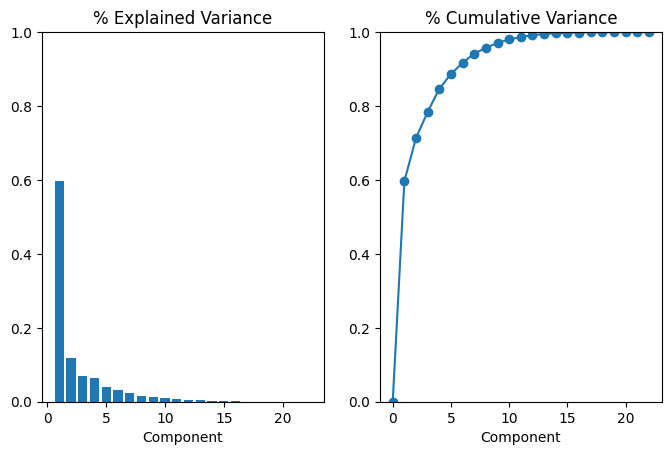

In [20]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

  # Look at explained variance
plot_variance(pca)

In [21]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_pca, y_train, discrete_features=False)
mi_scores

PC2     0.197136
PC1     0.157453
PC5     0.082609
PC19    0.072571
PC7     0.072146
PC8     0.068049
PC6     0.066993
PC4     0.046802
PC11    0.045502
PC13    0.044279
PC15    0.041603
PC20    0.020050
PC18    0.017712
PC3     0.017404
PC9     0.013532
PC14    0.006583
PC21    0.000000
PC12    0.000000
PC17    0.000000
PC16    0.000000
PC10    0.000000
PC22    0.000000
Name: MI Scores, dtype: float64

In [22]:
#training pca with 5 principal components
sklearn_pca = PCA(n_components=5)
X_train_pca = sklearn_pca.fit_transform(x_train)
X_test_pca = sklearn_pca.fit_transform(X_test)

# Machine learning models

SVM classifier

In [23]:
#instantiating the svm model
svm_model = SVC()
#training the mode
svm_model.fit(X_train_pca,y_train)

SVC()

In [24]:
svm_predictions = svm_model.predict(X_test_pca)

In [25]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.86      0.94      0.90        32

    accuracy                           0.82        39
   macro avg       0.68      0.61      0.63        39
weighted avg       0.79      0.82      0.80        39



Random Forest classifier

In [26]:
#instantiating the classifier
rf = RandomForestClassifier()
#training the model
rf.fit(X_train_pca,y_train)


RandomForestClassifier()

In [27]:
rf_predictions = rf.predict(X_test_pca)

In [28]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.86      0.94      0.90        32

    accuracy                           0.82        39
   macro avg       0.68      0.61      0.63        39
weighted avg       0.79      0.82      0.80        39



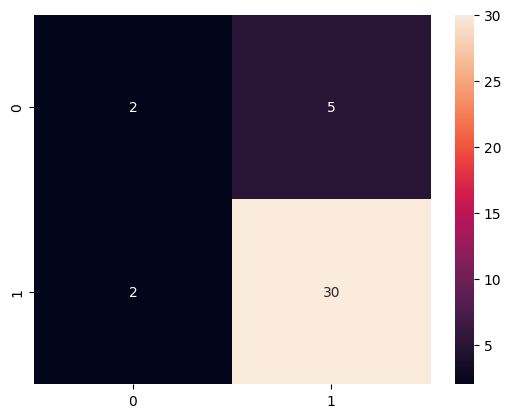

In [29]:
sns.heatmap(confusion_matrix(y_test,rf_predictions),annot=True)
plt.show()

Gradient Boosting classifier

In [30]:
gb = GradientBoostingClassifier()
gb.fit(X_train_pca,y_train)

GradientBoostingClassifier()

In [31]:
gb_predictions = gb.predict(X_test_pca)

In [32]:
print(classification_report(y_test,gb_predictions))

              precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.83      0.94      0.88        32

    accuracy                           0.79        39
   macro avg       0.58      0.54      0.54        39
weighted avg       0.74      0.79      0.76        39



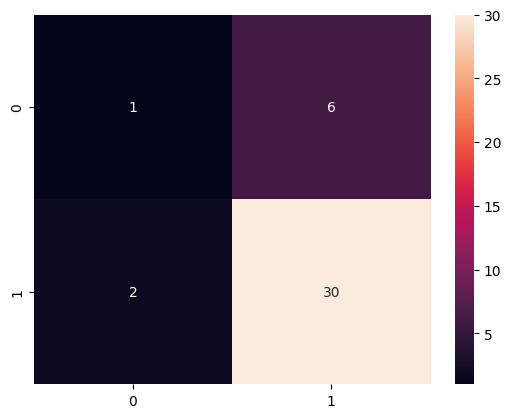

In [33]:
sns.heatmap(confusion_matrix(y_test,gb_predictions),annot=True)
plt.show()